Table Of Content


1. Environment setup
2. The Normal Distribution
3. Additional Information
4. Appendix
5. Summary & Resources For Further Reading


#Environment Setup


In [ ]:
!pip install --upgrade scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from scipy import stats
from scipy.integrate import quad
import seaborn as sns

from scipy.stats import norm


# The Normal Distribution

Whenever you encounter a mention of the "Normal distribution," it actually refers to the "Normal Probability Distribution." In simpler terms, the 'Normal Probability Distribution' describes how data points' probabilities are distributed in a typical and standard fashion.


Let's use an example to drive this point home. Imagine you're a curious data scientist analyzing the heights of people in a city. You collect a lot of data (sample) and want to understand how heights are distributed in the population(City). This is where the "Normal Probability Distribution" comes into play. It's like saying "the typical way that heights are spread out." The "Normal Probability Distribution" describes how heights are distributed in a typical or standard way. So, when you see that the heights in the city follow a "Normal Probability Distribution," you know that most people fall around the average height, with fewer people being much taller or shorter.









Without further ado, let's proceed by defining the formula that characterizes the normal distribution;



> 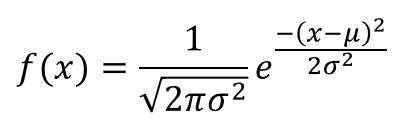



Where;

*   f(x) is the Probability Density Function (PDF)
*   σ =  standard deviation
*   μ = Mean














**Characteristics of the Normal distribution**
 * Symmetric, bell shaped
 * Continuous for all values of X between -∞ and ∞ so that each conceivable interval of real numbers has a probability other than zero.
 * -∞ ≤ X ≤ ∞
 * Two parameters, µ and σ. Note that the normal distribution is actually a family of distributions, since µ and σ determine the shape of the distribution.

* The notation N(µ, σ^2 ) means normally distributed with mean µ and variance σ ^2 . If we say X ∼ N(µ, σ^2 ) we mean that X is distributed N(µ, σ 2 ).
* About 2/3 of all cases fall within one standard deviation of the mean, that is P(µ - σ ≤ X ≤ µ + σ) = .6826.
*About 95% of cases lie within 2 standard deviations of the mean, that is P(µ - 2σ ≤ X ≤ µ + 2σ) = .9544. This is commonly referred to as the empirical rule


NOTE: *If  μ = 0 and σ = 1, the distribution is called a 'standard normal distribution'*



Text(0.5, 1.0, 'Normal Distribution')

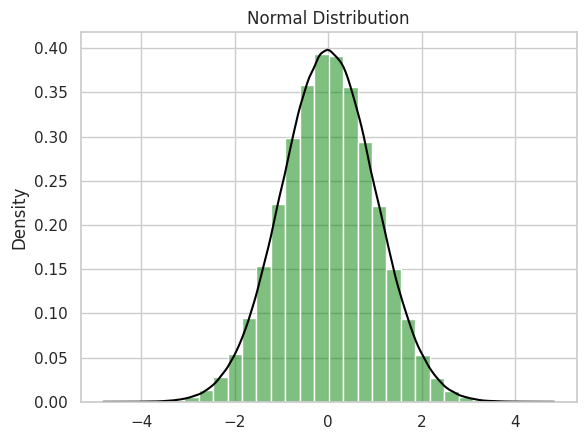

In [ ]:
np.random.seed(1)
N = 1000000
normalData = np.random.normal(0, 1, N)


sns.histplot(normalData, color='green', alpha=0.5,stat = 'density', bins=30 )
sns.kdeplot(normalData, color='black')
plt.title("Normal Distribution")


In statistics, the standard normal distribution is often represented by the symbol 'Z' and has a mean (μ) of 0 and a standard deviation (σ) of 1. This distribution is sometimes called the Z-distribution or the Gaussian distribution. It is a bell-shaped curve where most of the data falls within a few standard deviations of the mean.



> 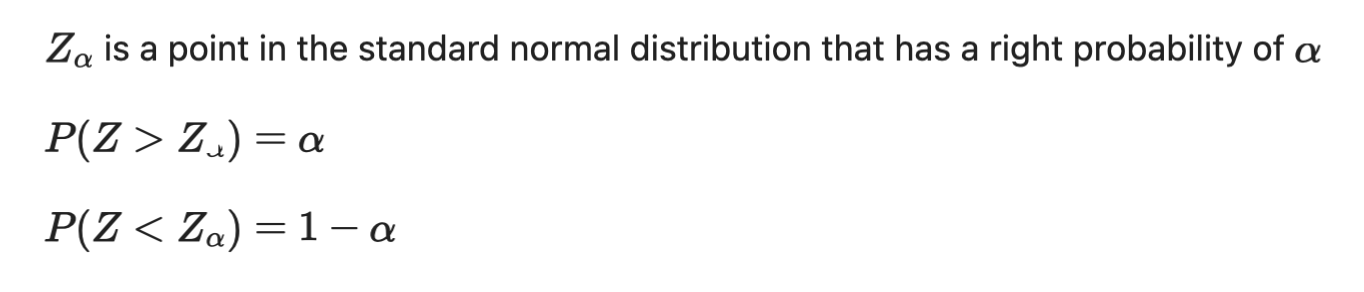



Z: This is a random variable that follows the standard normal distribution.

α (alpha): Alpha is a probability level, typically representing the area under the probability density function (PDF) of the standard normal distribution to the right of a certain Z-score.

P(Z > Zα): This represents the probability that the random variable Z is greater than some specific value Zα, where Zα is determined by the desired probability level α.

Summary:
The expression "P(Z > Zα) = α," means that the probability of the random variable Z being greater than a specific Zα is equal to α. In other words, it's saying that the area to the right of Zα on the standard normal distribution curve is equal to α.

**Cumulative distribution function**

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution. The percentile rank is a statistical measure that indicates the percentage of data points in a dataset that are equal to or below a particular value;




> *Percentile Rank = Total number of data points / Number of data points below the value x 100*

In this formula, the 'Number of data points below the value' represents the count of data points in the dataset that are less than or equal to the specific value for which you want to calculate the percentile rank.

For example, let's say you have a dataset of test scores, and you want to calculate the percentile rank for a score of 85. If, in your dataset, there are 100 test scores, and 30 of them are 85 or lower, then the "Number of data points below the value" in this case is 30. So, the formula for the percentile rank for a score of 85 would be:

*Percentile Rank (PR) = (30 / 100) × 100 = 30%*

This means that a test score of 85 is at the 30th percentile, indicating that it's equal to or better than 30% of the scores in the dataset. In other words, 85 is as good as or better than 30% of the test scores in this particular dataset.




The values in the Z-table are calculated using the cumulative distribution function of a standard normal distribution with a mean of zero and a standard deviation of one. This can be denoted with the equation below:




> 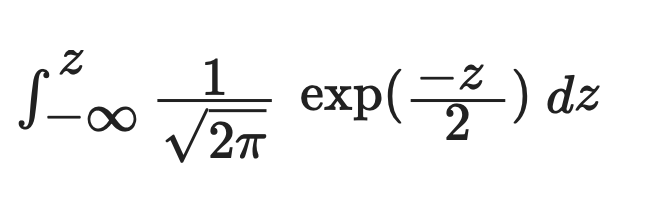

The cumulative distribution function (CDF) is a function that takes a value from a probability distribution and tells you the probability that a random variable from that distribution is less than or equal to that value. Put simply, the cumulative distribution function (CDF) informs you about the probability that a random variable from a distribution is at or below a specified value. In the context of the standard normal distribution (mean μ = 0, standard deviation σ = 1), the CDF is often denoted as Φ(z) or simply Φ.

The equation given above is the integral of the probability density function (PDF) of the standard normal distribution to calculate its CDF. Here's a breakdown of the components:




*  ∫ represents the integral, which is a mathematical operation that calculates the area under a curve.
* -∞ to z: This specifies the range of integration. In this case, it's integrating from negative infinity (-∞) to some value z.

* 1 / (2π): This is a constant factor that appears in the standard normal distribution's PDF. It ensures that the area under the curve equals 1, which is a fundamental property of probability distributions.

* exp(-z^2 / 2): This is the PDF of the standard normal distribution. The exponential function with the negative of z squared in the denominator gives you the bell-shaped curve characteristic of the standard normal distribution.

* dz: This represents the differential element of z, which signifies that we are integrating with respect to z.

The result of this integral, which evaluates from negative infinity to a specific value z, gives you the probability that a random variable from the standard normal distribution is less than or equal to z. In other words, it gives you the cumulative probability.

This integral is often calculated using numerical methods or looked up in standard normal distribution tables because it doesn't have a simple closed-form expression. The CDF for the standard normal distribution, Φ(z), provides valuable information for various statistical calculations and hypothesis testing, as it tells you the probability associated with different Z-scores.







In [ ]:
def normalProbDensity(x):
  constant = 1.0/ np.sqrt(2*np.pi)
  return(constant * np.exp((-x**2)/2.0))

standard_normal_table = pd.DataFrame(data = [], index = np.round(np.arange(0, 3.5, .1),2), columns = np.round(np.arange(0.00, .1, .01), 2))


for index in standard_normal_table.index:
  for column in standard_normal_table.columns:
    z = np.round(index +column, 2)
    value, _ = quad(normalProbDensity, np.NINF, z)
    standard_normal_table.loc[index, column] = value

#format to mkae  look like z table
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table.column = [str(column).ljust(4, '0') for column in standard_normal_table.columns]
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table








<ipython-input-48-92e4d55eb325>:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  standard_normal_table.column = [str(column).ljust(4, '0') for column in standard_normal_table.columns]


,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5,0.503989,0.507978,0.511966,0.515953,0.519939,0.523922,0.527903,0.531881,0.535856
0.1,0.539828,0.543795,0.547758,0.551717,0.55567,0.559618,0.563559,0.567495,0.571424,0.575345
0.2,0.57926,0.583166,0.587064,0.590954,0.594835,0.598706,0.602568,0.60642,0.610261,0.614092
0.3,0.617911,0.62172,0.625516,0.6293,0.633072,0.636831,0.640576,0.644309,0.648027,0.651732
0.4,0.655422,0.659097,0.662757,0.666402,0.670031,0.673645,0.677242,0.680822,0.684386,0.687933
0.5,0.691462,0.694974,0.698468,0.701944,0.705401,0.70884,0.71226,0.715661,0.719043,0.722405
0.6,0.725747,0.729069,0.732371,0.735653,0.738914,0.742154,0.745373,0.748571,0.751748,0.754903
0.7,0.758036,0.761148,0.764238,0.767305,0.77035,0.773373,0.776373,0.77935,0.782305,0.785236
0.8,0.788145,0.79103,0.793892,0.796731,0.799546,0.802337,0.805105,0.80785,0.81057,0.813267
0.9,0.81594,0.818589,0.821214,0.823814,0.826391,0.828944,0.831472,0.833977,0.836457,0.838913




To find the right probability of a point use;

```
norm.sf(X)
```




To find the left probability of a point, use the code below:

```
norm.cdf(X)
```

That is, if we already have the z-score value (eg using the z score formula we find 1.96), we can easily calculate the corresponding probability using;

In [ ]:
print(norm.cdf(1.96))

0.9750021048517795


The above result is our pobability of getting a value less (to the left of) than our z-value. Alternitively, we may be interested in finding the z value that represents said probability(area). Given a probability(area) , we can calculate the corresponding z-value as shown below:

To find a point that has a point with a left probability of α. use the following;


```
norm.ppf(α)
```

If you want to find a point that has a right probability of α, use;



```
-norm.ppf(α)
```

This is because the normal distribution is symmetrical so



> 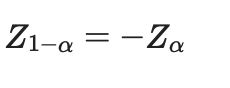











In [ ]:
X = 0.95
print(f'The point in the Normal Standard Distribution that has a left probability of *{X}*: ', norm.ppf(X))
print(f'The point in the Normal Standard Distribution that has a right probability of *{X}*: ', -norm.ppf(X))


The point in the Normal Standard Distribution that has a left probability of *0.95*:  1.6448536269514722
The point in the Normal Standard Distribution that has a right probability of *0.95*:  -1.6448536269514722


In [ ]:
#Whats the z-score for a probability of 0.975  under the normal distribution
print(norm.ppf(0.975))

1.959963984540054


In [ ]:
X = 1
print(f'The left probability of *{X}* in the Normal Standard Standard Distribution', norm.cdf(X))
print(f'Theright  probability of *{X}* in the Normal Standard Standard Distribution', norm.sf(X))



The left probability of *1* in the Normal Standard Standard Distribution 0.8413447460685429
Theright  probability of *1* in the Normal Standard Standard Distribution 0.15865525393145707


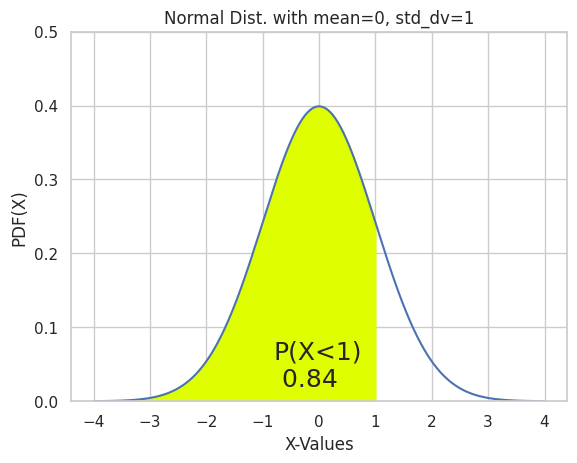

In [ ]:
fig, ax = plt.subplots()

#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(-4,1, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.cdf(X)
ax.text(-0.8, 0.02, f'P(X<{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

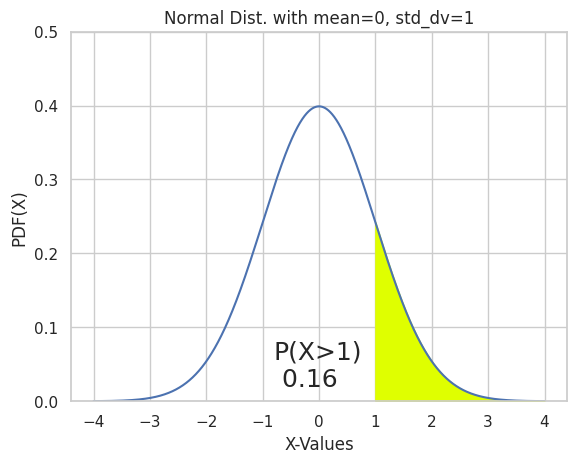

In [ ]:
fig, ax = plt.subplots()

#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(1,4, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.sf(X)
ax.text(-0.8, 0.02, f'P(X>{np.round(X, 3)})\n {np.round(prob, 2)}', fontsize=18);

In [ ]:
X = -1
Y = 1
print(f'The probability between *({X}, {Y})* in the Normal Standard Distribution is: ', norm.cdf(Y) - norm.cdf(X))

The probability between *(-1, 1)* in the Normal Standard Distribution is:  0.6826894921370859


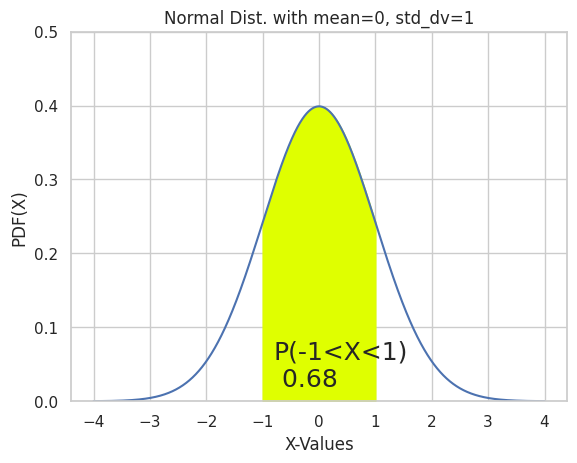

In [ ]:
fig, ax = plt.subplots()

#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')

#Fill_between
px=np.arange(-1,1, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.cdf(Y) - norm.cdf(X)
ax.text(-0.8, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18);

#Additional Information

If the probability distribution isn't standard normal distribution, you can loc=mean and scale=std;

In [ ]:
norm.cdf(X, loc=2, scale=3)

0.15865525393145707

The figure below summarises the emperical (68-95-99.7) rule

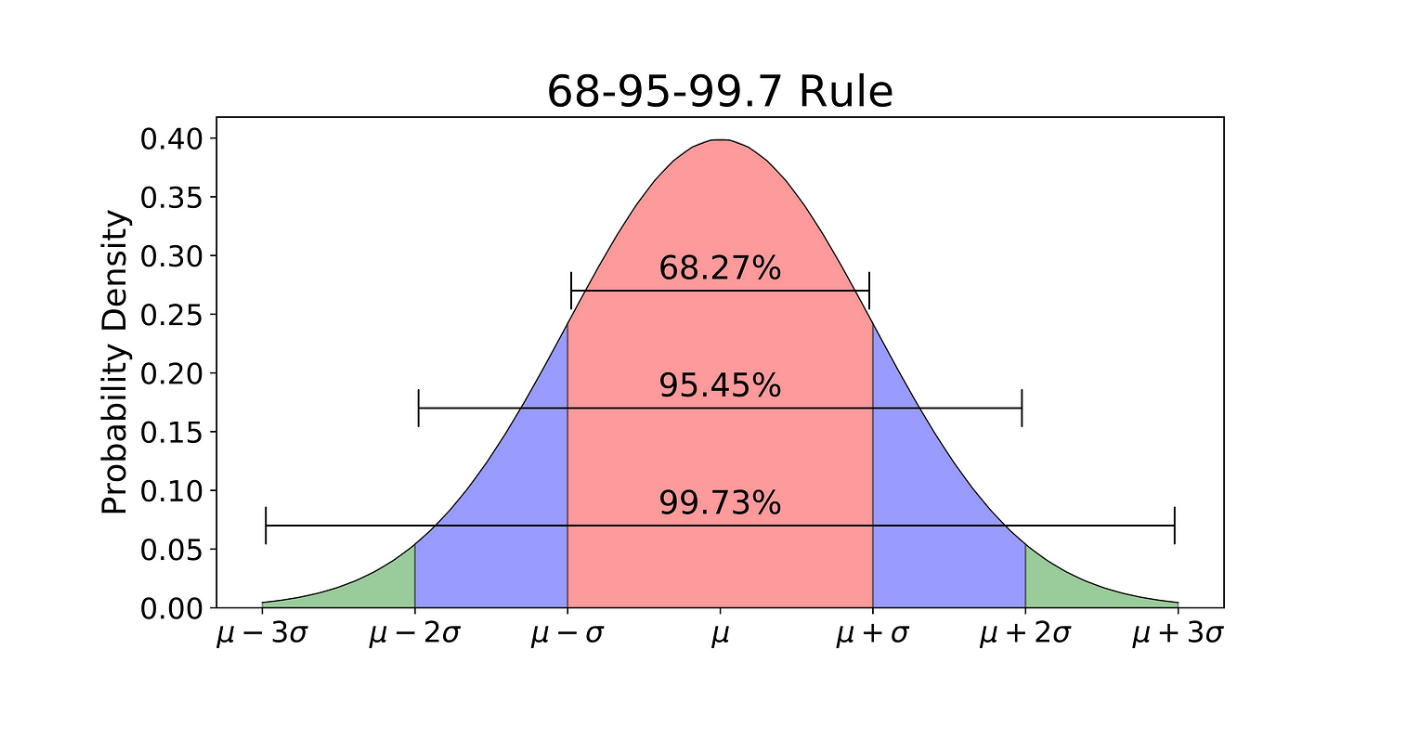



The code below gives us an evenly spaced scale range to show in the proceeding graph ie our x-axis containing the maximum and minimum z score values for the probability values in the range of 0.01 to 0.99 (remember that max probability is 1), with 100 total samples

In [ ]:
x = np.linspace(norm.ppf(0.01),
              norm.ppf(0.99), 100)


print(x)

[-2.32634787 -2.27935095 -2.23235402 -2.18535709 -2.13836017 -2.09136324
 -2.04436631 -1.99736939 -1.95037246 -1.90337553 -1.85637861 -1.80938168
 -1.76238475 -1.71538783 -1.6683909  -1.62139397 -1.57439705 -1.52740012
 -1.48040319 -1.43340627 -1.38640934 -1.33941241 -1.29241549 -1.24541856
 -1.19842163 -1.15142471 -1.10442778 -1.05743085 -1.01043393 -0.963437
 -0.91644007 -0.86944314 -0.82244622 -0.77544929 -0.72845236 -0.68145544
 -0.63445851 -0.58746158 -0.54046466 -0.49346773 -0.4464708  -0.39947388
 -0.35247695 -0.30548002 -0.2584831  -0.21148617 -0.16448924 -0.11749232
 -0.07049539 -0.02349846  0.02349846  0.07049539  0.11749232  0.16448924
  0.21148617  0.2584831   0.30548002  0.35247695  0.39947388  0.4464708
  0.49346773  0.54046466  0.58746158  0.63445851  0.68145544  0.72845236
  0.77544929  0.82244622  0.86944314  0.91644007  0.963437    1.01043393
  1.05743085  1.10442778  1.15142471  1.19842163  1.24541856  1.29241549
  1.33941241  1.38640934  1.43340627  1.48040319  1.52

We can then get the corresponding probabilities (pdf) of our (dummy) data as such;

In [ ]:
print(norm.pdf(x))

[0.02665214 0.0296985  0.03302004 0.03663206 0.04054955 0.04478694
 0.049358   0.05427559 0.05955143 0.06519596 0.07121803 0.0776247
 0.08442105 0.09160987 0.09919153 0.1071637  0.11552116 0.12425566
 0.13335569 0.14280642 0.1525895  0.16268307 0.17306164 0.18369615
 0.19455396 0.20559893 0.21679157 0.22808919 0.23944611 0.25081392
 0.26214179 0.2733768  0.28446433 0.29534848 0.30597253 0.3162794
 0.32621215 0.33571453 0.34473146 0.35320956 0.36109774 0.3683476
 0.37491403 0.38075561 0.38583507 0.39011967 0.39358159 0.39619817
 0.39795222 0.39883215 0.39883215 0.39795222 0.39619817 0.39358159
 0.39011967 0.38583507 0.38075561 0.37491403 0.3683476  0.36109774
 0.35320956 0.34473146 0.33571453 0.32621215 0.3162794  0.30597253
 0.29534848 0.28446433 0.2733768  0.26214179 0.25081392 0.23944611
 0.22808919 0.21679157 0.20559893 0.19455396 0.18369615 0.17306164
 0.16268307 0.1525895  0.14280642 0.13335569 0.12425566 0.11552116
 0.1071637  0.09919153 0.09160987 0.08442105 0.0776247  0.0712180

Plotting our probability density function (pdf) generates the following graph ([source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)):

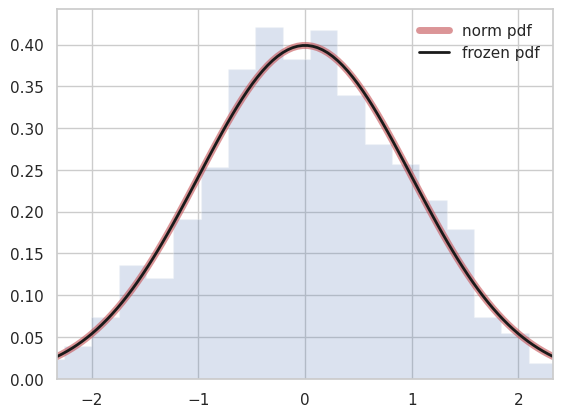

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
      'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = norm.rvs(size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

## Appendix


**Probability Density Functions PDFs**

A PDF is a statistical function that's used to describe the likelihood of a continuous random variable taking on a specific value. It provides the probability density at each point along the range of possible values for the random variable. Below are some characteristics of PDFs;


1. **Continuous Random Variables:** PDFs are primarily used for continuous random variables, as opposed to discrete random variables, which are described by probability mass functions (PMFs).

2. **Integration over a Range:** To find the probability that a continuous random variable falls within a specific range, you need to integrate the PDF over that range. In other words, the area under the PDF curve within the specified range represents the probability of the variable falling within that range.

3. **Non-Negative and Integrates to 1:** A valid PDF is always non-negative (it doesn't produce negative probabilities) and integrates to 1 over its entire range. This means that the total probability of all possible outcomes for the random variable is 1.

4. **Visual Representation:** PDFs are often graphically represented as curves or lines. The height of the curve at a particular point represents the probability density at that point.

5. The PDF formula (normal distribution) can be simplified by assuming we have a mean (μ) of zero and a standard deviation (σ) of one;




> 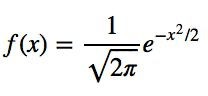




This PDF describes the likelihood of a value \(x\) occurring in a standard normal distribution, with a mean of 0 and a standard deviation of 1.

6. **Probability at a Single Point:** It's important to note that the probability of a continuous random variable taking on an exact single value (e.g., (P(X = a))) is technically zero because there are infinitely many possible values in a continuous distribution. Instead, we calculate probabilities for ranges or intervals.

7. **Example:* Common examples of probability density functions include the normal distribution (bell-shaped curve), the uniform distribution (constant probability within a specified range), and the exponential distribution (used for modeling the time between events in a Poisson process).

PDFs are fundamental in various statistical analyses, including hypothesis testing, probability modeling, and calculating expected values, and they provide a way to quantify the probability distribution of continuous random variables.

**Moment Genarating Function:**

A Moment Generating Function (MGF) is a mathematical function used in probability theory and statistics to characterize the properties of a probability distribution. It provides a convenient way to calculate moments (expectations) of a random variable, making it a powerful tool for probability and statistics.

*Definition*: The moment generating function of a random variable "X" is denoted as M(t) or M_X(t), where "t" is a real number. It is defined as:

M(t) = E(e^(tX))

Where:

"E" represents the expectation (or expected value) operator.
"t" is a parameter that varies over the real number line.
"X" is the random variable.
*Purpose*: The MGF allows us to calculate moments (expected values) of the random variable by taking derivatives of M(t) with respect to "t." Specifically, the nth moment of "X" can be calculated as:

E(X^n) = M^(n)(0)

Where:

"E(X^n)" is the nth moment.
"M^(n)(0)" is the nth derivative of M(t) evaluated at t = 0.
Moments: By calculating the derivatives of the MGF and evaluating them at t = 0, you can obtain the moments of the random variable, including the mean (first moment), variance (second moment), skewness, and kurtosis.

*Properties:* The MGF is particularly useful for handling sums of independent random variables. If you have two independent random variables, X and Y, the MGF of their sum X + Y is the product of their individual MGFs: M_X+Y(t) = M_X(t) * M_Y(t).

*Existence:* Not all random variables have a well-defined MGF. The MGF exists for a random variable if it is defined in some neighborhood of zero (i.e., around t = 0).

*Uniqueness:* If two random variables have the same MGF, they have the same probability distribution. However, it's important to note that two random variables can have different MGFs and still have the same moments.




# Summary and Resources



1. [What is the Normal Distribution?](https://www.scribbr.com/statistics/normal-distribution/)
The normal distribution, also known as the Gaussian distribution or the bell curve, is a statistical concept that describes the distribution of a continuous random variable. It's called "normal" because it's one of the most common patterns found in real-world data.

2. [Key Characteristics](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/PH717-Module6-RandomError5.html):

Bell-Shaped Curve: The normal distribution has a symmetrical, bell-shaped curve. The peak of the curve represents the mean (average) of the data.
Mean, Median, and Mode: In a normal distribution, the mean, median, and mode are all equal and located at the center of the curve.
Standard Deviation: The spread or dispersion of data is quantified by the standard deviation. Smaller standard deviations mean data is closely packed around the mean, while larger deviations indicate a wider spread.
3. [The Emperical (68-95-99.7) Rule](https://www.freecodecamp.org/news/normal-distribution-explained/):

About 68% of the data falls within one standard deviation of the mean.
About 95% falls within two standard deviations.
Approximately 99.7% falls within three standard deviations.

4. [ Z-Score](https://statisticsbyjim.com/basics/z-score/#:~:text=A%20z%2Dscore%20measures%20the,above%20or%20below%20the%20mean.):

A z-score measures how many standard deviations an individual data point is from the mean. It helps you standardize data and compare different distributions.
5. [Real-Life Applications](https://www.statology.org/example-of-normal-distribution/):

The normal distribution is prevalent in nature, including human traits like height and weight.
It's used in various fields, including finance (for risk assessment), biology (to analyze biological data), and quality control (to monitor manufacturing processes).
6. [Central Limit Theorem](https://ai.plainenglish.io/central-limit-theorem-a-complete-guide-for-beginners-c17a6bd7417?gi=f13d41fa45ac):

This theorem states that the distribution of the sample means of large enough samples from any population will be approximately normally distributed. It's fundamental in statistics and data analysis.

7. [Not Always "Normal"](https://www.statisticshowto.com/probability-and-statistics/non-normal-distributions/):

While the normal distribution is a common approximation for many real-world phenomena, it's essential to remember that not all data follows a perfect normal distribution. Sometimes, other distribution types (like skewed or exponential) are more appropriate.
Understanding the normal distribution is crucial for various statistical analyses, hypothesis testing, and making data-driven decisions. It provides a solid foundation for handling and interpreting data effectively.


**Additional resources:**

https://www.stat.colostate.edu/inmem/gumina/st201/pdf/NormalDistribution.pdf

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/PH717-Module6-RandomError5.html

https://statisticsbyjim.com/basics/z-score/#:~:text=A%20z%2Dscore%20measures%20the,above%20or%20below%20the%20mean.


In [ ]:
!pip install nbconvert

In [2]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Explorations in data Analytics /Special continuous random variables/special continuous random variables.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Explorations in data Analytics /Special continuous random variables/special continuous random variables.ipynb to html
[NbConvertApp] Writing 1223051 bytes to /content/drive/MyDrive/Explorations in data Analytics /Special continuous random variables/special continuous random variables.html
